# Assignment A: Fully Connected Autoencoder

1.Modify the code below to define an architecture [784 -> 256 -> 64 -> 256 -> 784]  

2.Add L2 cost function to optimize  

3.Visualize the reconstructions  

4.Run the network with different learning and plot loss curves (LR = 0.5, 0.1, 0.05, 0.01)  

5.Add Gaussian Noise (kernel with sd=0.05) to distort the input and run with LR = 0.01

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])
# Add noise to X to use as denoising autoencoder
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder (Modify Encoder here)
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder (Modify decoder here)
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model

# Add the architecture Here!!! Final Output of decoder is 'decoder_op'

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
# Add the cost function here as 'cost'


optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

    # Estimate the test set cost here
    
    
     # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.waitforbuttonpress()

# Assignment B: Fully Connected Autoencoder

1.Modify the code below to define an architecture [784 -> 64 -> 784]

2.Add L1 + L2 cost function to optimize (Elastic Norm)

3.Add Batch Normalization layer in the encoder.

4.Visualize the reconstructions

5.Add Salt/Pepper Noise (p = 0.01) to distort the input and run with LR = 0.01

In [ ]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

In [ ]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])
# Add noise to X to use as denoising autoencoder
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder (Modify Encoder here)
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder (Modify decoder here)
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model

# Add the architecture Here!!! Final Output of decoder is 'decoder_op'

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
# Add the cost function here as 'cost'


optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

    # Estimate the test set cost here
    
    
     # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.waitforbuttonpress()

# Assignment C: Convolutional Autoencoder

1.Modify the code below: Insert Batch Normalization for both encoder and decoders after convolutional layer.

2.Add Cost function L2

3.Write code to visualize the reconstructions and show them.

4.Change the Learning and report the loss curve (LR = 1e-4, 1e-6, 1e-8).

5.Add Gaussian Noise (kernel with sd=0.05) to distort the input and run with LR = 1e-6

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 1/1... Training loss: 9596.3975
Epoch: 1/1... Training loss: 9021.2598
Epoch: 1/1... Training loss: 8393.2607
Epoch: 1/1... Training loss: 7881.9688
Epoch: 1/1... Training loss: 7098.2466
Epoch: 1/1... Training loss: 7224.0938
Epoch: 1/1... Training loss: 7029.9668
Epoch: 1/1... Training loss: 6859.8857
Epoch: 1/1... Training loss: 6883.1719
Epoch: 1/1... Training loss: 6768.2632
Epoch: 1/1... Training loss: 6559.9463
Epoch: 1/1... Training loss: 6614.0815
Epoch: 1/1... Training loss: 6680.0190
Epoch: 1/1... Training loss: 6350.1133
Epoch: 1/1... Training loss: 6055.2207
Epoch: 1/1... Training loss: 5570.8164
Epoch: 1/1... Training loss: 5500.4937
Epoch: 1/1... Training loss: 5140.8018
Epoch: 1/1... Training loss: 5134.8398
Epoch: 1/1... Training loss: 5004.6899
Epoch: 1/1... Training los

Epoch: 1/1... Training loss: 2181.5984
Epoch: 1/1... Training loss: 2019.6356
Epoch: 1/1... Training loss: 2152.6436
Epoch: 1/1... Training loss: 2030.3457
Epoch: 1/1... Training loss: 2078.6892
Epoch: 1/1... Training loss: 2086.3513
Epoch: 1/1... Training loss: 2088.2852
Epoch: 1/1... Training loss: 2090.2932
Epoch: 1/1... Training loss: 2063.1631
Epoch: 1/1... Training loss: 2079.6724
Epoch: 1/1... Training loss: 2175.6426
Epoch: 1/1... Training loss: 2071.9639
Epoch: 1/1... Training loss: 2070.4448
Epoch: 1/1... Training loss: 2043.7109
Epoch: 1/1... Training loss: 2064.5212
Epoch: 1/1... Training loss: 2038.2189
Epoch: 1/1... Training loss: 2017.9547
Epoch: 1/1... Training loss: 2005.3357
Epoch: 1/1... Training loss: 1949.6172
Epoch: 1/1... Training loss: 2030.0680
Epoch: 1/1... Training loss: 1970.1616
Epoch: 1/1... Training loss: 2081.5493
Epoch: 1/1... Training loss: 2134.1094
Epoch: 1/1... Training loss: 2014.0527
Epoch: 1/1... Training loss: 2029.0481
Epoch: 1/1... Training lo

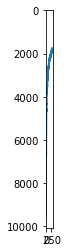

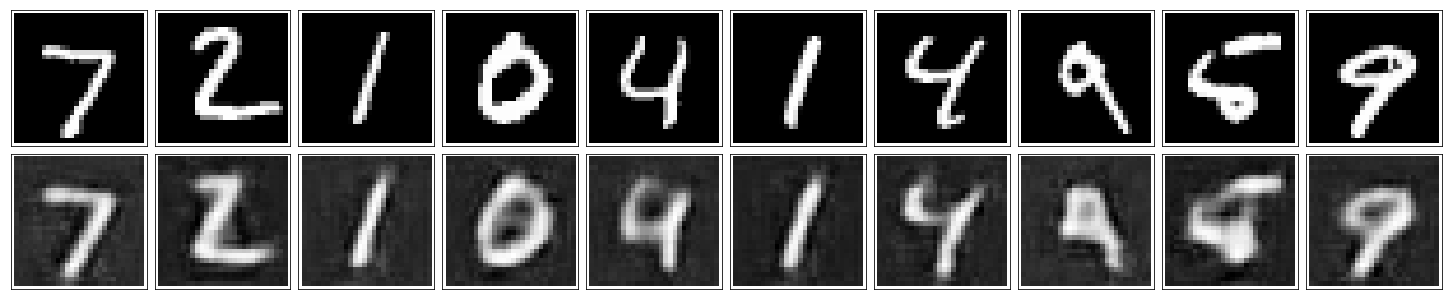

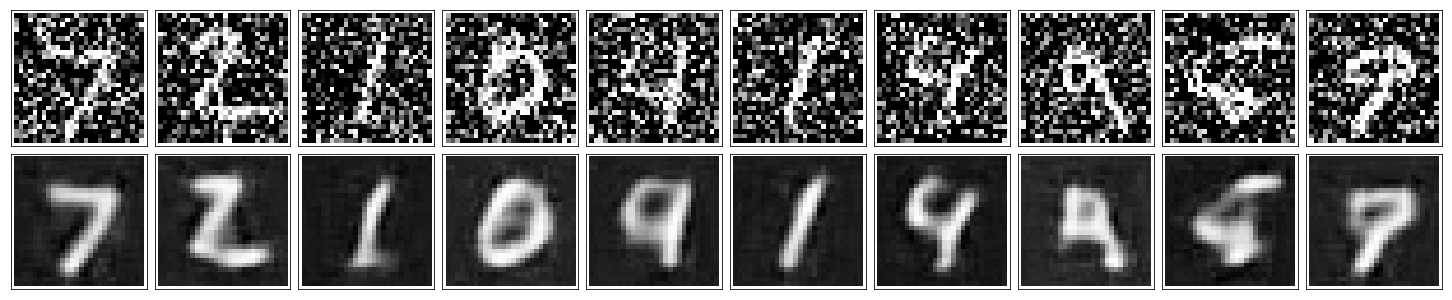

In [5]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

#Diaplay Image here
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')


inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
conv1 = tf.layers.batch_normalization(conv1)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
conv2= tf.layers.batch_normalization(conv2)#ow 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
conv3= tf.layers.batch_normalization(conv3)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
conv4= tf.layers.batch_normalization(conv4)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
conv5= tf.layers.batch_normalization(conv5)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
conv6= tf.layers.batch_normalization(conv6)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1
decoded = tf.nn.sigmoid(logits, name='decoded')

#MODIFY LOSS function here: 
#L2 loss
res = tf.add(logits,-targets_)
loss= tf.nn.l2_loss(res)


#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)


#Training Session
sess = tf.Session()
axis=0
epochs = 1 
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5


sess.run(tf.global_variables_initializer())
final_loss=[]
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})
        
        # Add random noise to the input images Gaussian noise
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost_noisy, _noisy = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})
        
        
        final_loss.append(batch_cost)
        axis +=1
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))
        
#Plot Loss Curve here
#Normalise the Loss
batch_cost =np.squeeze(batch_cost)
#lt.axis([0, axis] [0,9000])
plt.plot(final_loss)
plt.show()


#ig = plt.figure()                                                               
#x = fig.add_subplot(1,1,1)                                                      
#x.plot(axis,final_loss)

# Ticks after every 20 .. 
#ajor_ticks = np.arange(0, 9000, 1000)
#_ticks = np.arrange(0,aixs, 100)
#x.set_xticks(xticks)                                                       
#x.set_yticks(major_ticks)  




#Reconstruct Image Here
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})


for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

#Recover Good images from Noisy Images here
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

noisy_recover = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, noisy_recover], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)




sess.close()

# Assignment D: Convolutional Autoencoder

1.Modify the code below: Insert dropout layer for decoders after convolutional layer.

2.Add Cost function L2+L1 (Elastic Norm)

3.Write code to visualize the reconstructions and show them.

4.Change the Learning and report the loss curve (LR = 1e-4, 1e-6, 1e-8).

5.Add Salt/Pepper Noise (p = 0.01) to distort the input and run with LR = 1e-6

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))



# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1


# Define the Placeholders
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image = tf.pad(x_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
# Add noise to x_image to use as denoising autoencoder
y_true = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='y_true')
y_image = tf.reshape(y_true, [-1, img_size, img_size, num_channels])
y_image = tf.pad(y_image, paddings=[[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') # Pad to make images 32*32
print(y_image.get_shape())



def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))


def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))


# Modify Encoder Block here

def encoder_block(input,  # The previous layer.
                   num_input_channels,  # Num. channels in prev. layer.
                   filter_size,  # Width and height of filters.
                   num_filters,  # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    if use_pooling:
        # This is 2x2 max-pooling
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')


    return layer, weights


# Modify Decoder Block here

def decoder_block(input,  # The previous layer.
                  num_input_channels,  # Num. channels in prev. layer.
                  filter_size,  # Width and height of filters.
                  num_filters):  # Number of filters.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    h,w,c = input.get_shape().as_list()[1:]
    #print(sz[1])
    tr_weights = new_weights(shape=[2,2,num_input_channels, num_input_channels])
    tr_bias = new_biases(length=num_input_channels)
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    temp_batch_size = 32 #tf.shape(input).as_list()[0]
    out_sz = [temp_batch_size,2*h,2*w,c]
    layer = tf.nn.conv2d_transpose(value=input,
                             filter=tr_weights,
                             output_shape=out_sz,
                             strides=[1,2,2,1],
                             padding='VALID')

    layer += tr_bias
    layer = tf.nn.relu(layer)
    layer = tf.nn.conv2d(input=layer,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')
    layer += biases
    layer = tf.nn.relu(layer)

    return layer, weights, tr_weights


encoder1, w_e1 = encoder_block(input=x_image,
                       num_input_channels=num_channels,
                       filter_size=3,
                       num_filters=4,
                       use_pooling=True)

print(encoder1.get_shape())

encoder2, w_e2 = encoder_block(input=encoder1,
                       num_input_channels=4,
                       filter_size=3,
                       num_filters=8,
                       use_pooling=True)

print(encoder2.get_shape())

encoder3, w_e3 = encoder_block(input=encoder2,
                       num_input_channels=8,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=True)

print(encoder3.get_shape())

bottleneck, wb = encoder_block(input=encoder3,
                       num_input_channels=16,
                       filter_size=3,
                       num_filters=16,
                       use_pooling=False)

print(bottleneck.get_shape())

decoder3, w_d3, trw_d3 = decoder_block(input = bottleneck,
                        num_input_channels = 16,
                        filter_size = 3,
                        num_filters = 8)

print(decoder3.get_shape())

decoder2, w_d2, trw_d2 = decoder_block(input = decoder3,
                        num_input_channels = 8,
                        filter_size = 3,
                        num_filters = 4)
print(decoder2.get_shape())


decoder1, w_d1, trw_d1 = decoder_block(input = decoder2,
                        num_input_channels = 4,
                        filter_size = 3,
                        num_filters = 2)
print(decoder1.get_shape())

regressor = tf.nn.conv2d(input=decoder1,
                         filter=new_weights(shape=[3,3,2,1]),
                         strides=[1, 1, 1, 1],
                         padding='SAME')
regressor += new_biases(length=1)

#a = tf.shape(input=regressor)

print(regressor.get_shape())


#### Cost Function Enter here #####

res = tf.add(regressor, -y_image)


# Enter Loss Function here as 'loss'

#####


optimizer = tf.train.AdamOptimizer(learning_rate=1e-6).minimize(loss)



# Saver
saver = tf.train.Saver()
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = os.path.join(save_dir, 'best_validation')

# Run Session
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 32

# Counter for total number of iterations performed so far.
total_iterations = 0

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1000





def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations
    global best_validation_accuracy
    global last_improvement

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: x_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0 or (i == (num_iterations - 1)):
            # Calculate the accuracy on the training-set.
            acc = session.run(loss, feed_dict=feed_dict_train)

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess=session, save_path=save_path)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Loss: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))